In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
from math import *
from pylab import *

# IMPORTING THE DATASET

In [4]:
dataset = pd.read_csv('Salary_Data.csv')

In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

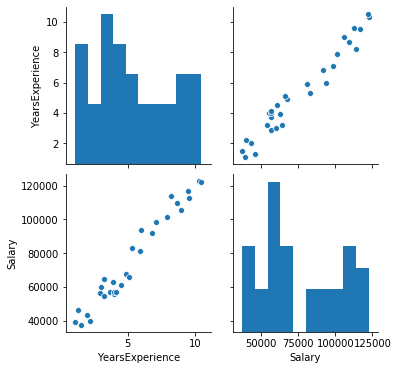

In [7]:
sns.pairplot(dataset)

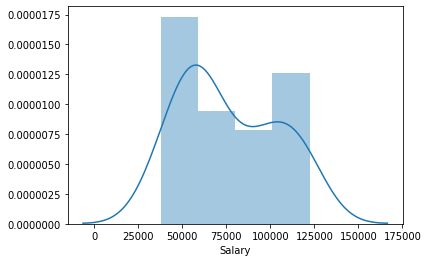

In [8]:
sns.distplot(dataset['Salary'])

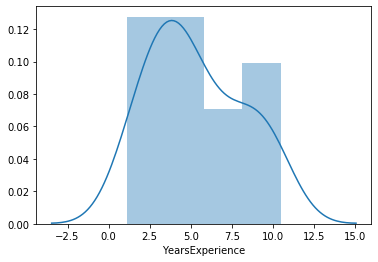

In [9]:
sns.distplot(dataset['YearsExperience'])

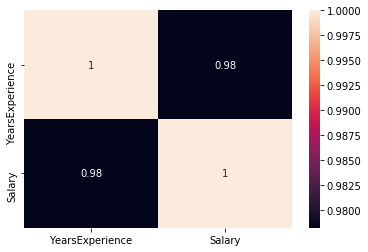

In [10]:
sns.heatmap(dataset.corr(),annot=True)

# LINEAR REGRESSION

In [11]:
x = dataset.iloc[:, :-1].values #years of experience
y = dataset.iloc[:, 1].values	#salary

### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0
)

### Fitting Simple Linear Regression to the Training set

In [13]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the Training set results

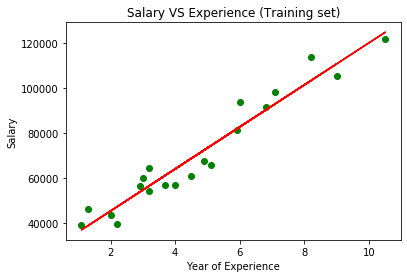

In [14]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='GREEN')
viz_train.plot(x_train, regressor.predict(x_train), color='RED') 
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience') 
viz_train.ylabel('Salary')
viz_train.show()

### Visualizing the Test set results

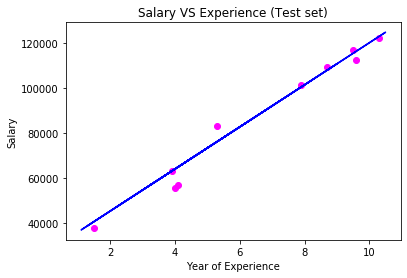

In [15]:
viz_test = plt
viz_test.scatter(x_test, y_test, color='MAGENTA')
viz_test.plot(x_train, regressor.predict(x_train), color='BLUE') 
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience') 
viz_test.ylabel('Salary')
viz_test.show()

### Predicting the result of 5 Years Experience

In [24]:
y_pred = regressor.predict([[5]]) 
print(y_pred)

[73545.90445964]


### Predicting the Training Set Results

In [19]:
y_pred = regressor.predict(x_train) 
print(y_pred)
print(x_test)

[ 53919.42532909  74480.49870396  56723.20806202  68872.93323808
 103452.92027763  90368.60085726  38965.91742009 124948.58789682
  54854.0195734   47377.2656189   81957.25265845  82891.84690277
  61396.17928358  56723.20806202 110929.67423213  45508.07713028
  37096.72893147  93172.3835902   72611.31021533  64199.96201652]
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


### Predicting the Test set results

In [18]:
y_pred = regressor.predict(x_test) 
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


### Predicting the errors along with accuracy

In [19]:
from sklearn import metrics

In [20]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 3426.4269374307123
Mean Squared Error: 21026037.329511296
Root Mean Squared Error: 21026037.329511296


In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor_tree=RandomForestRegressor(n_estimators=10, random_state=0)
regressor_tree.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [25]:
y_pred=regressor_tree.predict([[5]])
print(y_pred)

[69071.2]


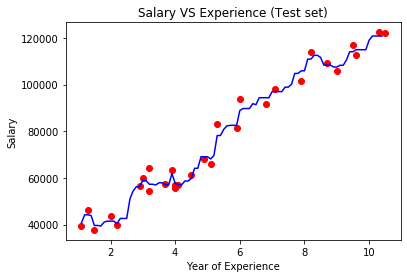

In [32]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='red')
plt.plot(x_grid, regressor_tree.predict(x_grid),color='blue')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience') 
plt.ylabel('Salary')
plt.show()